# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Use the JSON module to load and parse JSON documents
* Load and explore unknown JSON schemas
* Convert JSON to a pandas dataframe

## Loading the JSON file

Load the data from the file `disease_data.json`.

In [1]:
#Your code here 
import json
import pandas as pd

f = open('disease_data.json')
data = json.load(f)

## Explore the first and second levels of the schema hierarchy

In [2]:
#Your code here
print(f'The top level data type is {type(data)}')

The top level data type is <class 'dict'>


In [3]:
data.keys()

dict_keys(['meta', 'data'])

In [4]:
type(data['meta'])

dict

In [6]:
data['meta'].keys()

dict_keys(['view'])

In [7]:
type(data['meta']['view'])

dict

In [8]:
data['meta']['view'].keys()

dict_keys(['id', 'name', 'attribution', 'attributionLink', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'indexUpdatedAt', 'licenseId', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowClass', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'columns', 'grants', 'license', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])

In [27]:
for key in data['meta']['view'].keys():
    print(key, type(data['meta']['view'][key]))

id <class 'str'>
name <class 'str'>
attribution <class 'str'>
attributionLink <class 'str'>
averageRating <class 'int'>
category <class 'str'>
createdAt <class 'int'>
description <class 'str'>
displayType <class 'str'>
downloadCount <class 'int'>
hideFromCatalog <class 'bool'>
hideFromDataJson <class 'bool'>
indexUpdatedAt <class 'int'>
licenseId <class 'str'>
newBackend <class 'bool'>
numberOfComments <class 'int'>
oid <class 'int'>
provenance <class 'str'>
publicationAppendEnabled <class 'bool'>
publicationDate <class 'int'>
publicationGroup <class 'int'>
publicationStage <class 'str'>
rowClass <class 'str'>
rowsUpdatedAt <class 'int'>
rowsUpdatedBy <class 'str'>
tableId <class 'int'>
totalTimesRated <class 'int'>
viewCount <class 'int'>
viewLastModified <class 'int'>
viewType <class 'str'>
columns <class 'list'>
grants <class 'list'>
license <class 'dict'>
metadata <class 'dict'>
owner <class 'dict'>
query <class 'dict'>
rights <class 'list'>
tableAuthor <class 'dict'>
tags <class '

In [5]:
type(data['data'])

list

In [12]:
len(data['data'])

60266

In [13]:
type(data['data'][0])

list

In [14]:
len(data['data'][0])

42

In [18]:
type(data['data'][0][0])

int

In [24]:
data['data'][0]

[1,
 'FF49C41F-CE8D-46C4-9164-653B1227CF6F',
 1,
 1527194521,
 '959778',
 1527194521,
 '959778',
 None,
 '2016',
 '2016',
 'US',
 'United States',
 'BRFSS',
 'Alcohol',
 'Binge drinking prevalence among adults aged >= 18 years',
 None,
 '%',
 'Crude Prevalence',
 '16.9',
 '16.9',
 '*',
 '50 States + DC: US Median',
 '16',
 '18',
 'Overall',
 'Overall',
 None,
 None,
 None,
 None,
 [None, None, None, None, None],
 None,
 '59',
 'ALC',
 'ALC2_2',
 'CRDPREV',
 'OVERALL',
 'OVR',
 None,
 None,
 None,
 None]

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [25]:
#Your code here
data['meta']['view']['columns']

[{'id': -1,
  'name': 'sid',
  'dataTypeName': 'meta_data',
  'fieldName': ':sid',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'id',
  'dataTypeName': 'meta_data',
  'fieldName': ':id',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'position',
  'dataTypeName': 'meta_data',
  'fieldName': ':position',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_at',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_meta',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_meta',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'updated_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':updated_at'

In [29]:
df = pd.DataFrame.from_dict(data['data'])
df.columns = [col['name'] for col in data['meta']['view']['columns']]
df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,...,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,...,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,...,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,...,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,...,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None


## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [31]:
df.keys()

Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'YearStart', 'YearEnd', 'LocationAbbr',
       'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response',
       'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt',
       'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
       'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1', 'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [33]:
df['Topic'].unique()

array(['Alcohol', 'Arthritis', 'Asthma', 'Cancer', 'Diabetes',
       'Mental Health', 'Chronic Obstructive Pulmonary Disease',
       'Oral Health', 'Cardiovascular Disease', 'Immunization',
       'Chronic Kidney Disease',
       'Nutrition, Physical Activity, and Weight Status', 'Older Adults',
       'Tobacco', 'Overarching Conditions', 'Reproductive Health',
       'Disability'], dtype=object)

In [44]:
pd.options.display.max_columns = None

In [48]:
df[df['Topic'] == 'Asthma']

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,GeoLocation,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
4725,4726,786EA689-97C8-45C7-B733-9CF01D8AEB62,4726,1527194522,959778,1527194522,959778,None,2016,2016,IL,Illinois,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Crude Prevalence,6.5,6.5,None,None,5.4,7.9,Gender,Male,None,None,None,None,"[None, 40.48501028300046, -88.99771017799969, ...",None,17,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
5529,5530,AC33E8A2-F507-48D5-B02C-9179EDC425E3,5530,1527194522,959778,1527194522,959778,None,2016,2016,IN,Indiana,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Crude Prevalence,6.7,6.7,None,None,5.8,7.7,Gender,Male,None,None,None,None,"[None, 39.766910452000445, -86.14996019399968,...",None,18,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
5632,5633,1E855D58-2A98-44E2-A062-AE1E8A2F7DB6,5633,1527194522,959778,1527194522,959778,None,2016,2016,IA,Iowa,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Crude Prevalence,5.6,5.6,None,None,4.7,6.7,Gender,Male,None,None,None,None,"[None, 42.46940091300047, -93.81649055599968, ...",None,19,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
6777,6778,D300D76F-6293-4C41-B47F-AB8A93426EE2,6778,1527194522,959778,1527194522,959778,None,2016,2016,KS,Kansas,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Crude Prevalence,6.1,6.1,None,None,5.4,6.9,Gender,Male,None,None,None,None,"[None, 38.34774030000045, -98.20078122699965, ...",None,20,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
7034,7035,5868F7F7-82F1-4D72-A144-767DFA87D581,7035,1527194522,959778,1527194522,959778,None,2016,2016,KY,Kentucky,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Crude Prevalence,6.9,6.9,None,None,5.9,8,Gender,Male,None,None,None,None,"[None, 37.645970271000465, -84.77497104799966,...",None,21,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14049,14044,BF758BF8-DC9D-483A-9687-C75D1C04D131,14044,1527194524,959778,1527194524,959778,None,2016,2016,WI,Wisconsin,BRFSS,Asthma,Pneumococcal vaccination among noninstitutiona...,None,%,Age-adjusted Prevalence,None,None,****,Sample size of denominator and/or age group fo...,None,None,Race/Ethnicity,"Multiracial, non-Hispanic",None,None,None,None,"[None, 44.39319117400049, -89.81637074199966, ...",None,55,AST,AST6_2,AGEADJPREV,RACE,MRC,None,None,None,None
14050,14045,4AB6FD3F-EB88-460F-82DD-8E42A26DDD29,14045,1527194524,959778,1527194524,959778,None,2016,2016,WY,Wyoming,BRFSS,Asthma,Pneumococcal vaccination among noninstitutiona...,None,%,Age-adjusted Prevalence,None,None,****,Sample size of denominator and/or age group fo...,None,None,Race/Ethnicity,"Multiracial, non-Hispanic",None,None,None,None,"[None, 43.23554134300048, -108.10983035299967,...",None,56,AST,AST6_2,AGEADJPREV,RACE,MRC,None,None,None,None
14051,14046,854D56B2-888A-49E0-8F5B-96A6D4DB5B2A,14046,1527194524,959778,1527194524,959778,None,2016,2016,GU,Guam,BRFSS,Asthma,Pneumococcal vaccination among noninstitutiona...,None,%,Age-adjusted Prevalence,None,None,****,Sample size of denominator and/or age group fo...,None,None,Race/Ethnicity,"Multiracial, non-Hispanic",None,None,None,None,"[None, 13.444304, 144.793731, None, False]",None,66,AST,AST6_2,AGEADJPREV,RACE,MRC,None,None,None,None
14052,14

In [56]:
df[df['QuestionID'] == 'AST1_1']

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,GeoLocation,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
4725,4726,786EA689-97C8-45C7-B733-9CF01D8AEB62,4726,1527194522,959778,1527194522,959778,None,2016,2016,IL,Illinois,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Crude Prevalence,6.5,6.5,None,None,5.4,7.9,Gender,Male,None,None,None,None,"[None, 40.48501028300046, -88.99771017799969, ...",None,17,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
5529,5530,AC33E8A2-F507-48D5-B02C-9179EDC425E3,5530,1527194522,959778,1527194522,959778,None,2016,2016,IN,Indiana,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Crude Prevalence,6.7,6.7,None,None,5.8,7.7,Gender,Male,None,None,None,None,"[None, 39.766910452000445, -86.14996019399968,...",None,18,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
5632,5633,1E855D58-2A98-44E2-A062-AE1E8A2F7DB6,5633,1527194522,959778,1527194522,959778,None,2016,2016,IA,Iowa,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Crude Prevalence,5.6,5.6,None,None,4.7,6.7,Gender,Male,None,None,None,None,"[None, 42.46940091300047, -93.81649055599968, ...",None,19,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
6777,6778,D300D76F-6293-4C41-B47F-AB8A93426EE2,6778,1527194522,959778,1527194522,959778,None,2016,2016,KS,Kansas,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Crude Prevalence,6.1,6.1,None,None,5.4,6.9,Gender,Male,None,None,None,None,"[None, 38.34774030000045, -98.20078122699965, ...",None,20,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
7034,7035,5868F7F7-82F1-4D72-A144-767DFA87D581,7035,1527194522,959778,1527194522,959778,None,2016,2016,KY,Kentucky,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Crude Prevalence,6.9,6.9,None,None,5.9,8,Gender,Male,None,None,None,None,"[None, 37.645970271000465, -84.77497104799966,...",None,21,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10225,10222,991F3835-2D2C-4AB7-AABB-D0FC695165E6,10222,1527194523,959778,1527194523,959778,None,2016,2016,WI,Wisconsin,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Age-adjusted Prevalence,None,None,****,Sample size of denominator and/or age group fo...,None,None,Race/Ethnicity,"Multiracial, non-Hispanic",None,None,None,None,"[None, 44.39319117400049, -89.81637074199966, ...",None,55,AST,AST1_1,AGEADJPREV,RACE,MRC,None,None,None,None
10226,10223,3A6BD3F0-762E-4F4D-B392-472F086E15CC,10223,1527194523,959778,1527194523,959778,None,2016,2016,WY,Wyoming,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Age-adjusted Prevalence,None,None,****,Sample size of denominator and/or age group fo...,None,None,Race/Ethnicity,"Multiracial, non-Hispanic",None,None,None,None,"[None, 43.23554134300048, -108.10983035299967,...",None,56,AST,AST1_1,AGEADJPREV,RACE,MRC,None,None,None,None
10227,10224,D1541B38-4009-476E-96A7-3530803F9D31,10224,1527194523,959778,1527194523,959778,None,2016,2016,GU,Guam,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Age-adjusted Prevalence,None,None,****,Sample size of denominator and/or age group fo...,None,None,Race/Ethnicity,"Multiracial, non-Hispanic",None,None,None,None,"[None, 13.444304, 144.793731, None, False]",None,66,AST,AST1_1,AGEADJPREV,RACE,MRC,None,None,None,None
10228,10

In [80]:
asthma_df = df[df['QuestionID'] == 'AST1_1']
asthma_df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,GeoLocation,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
4725,4726,786EA689-97C8-45C7-B733-9CF01D8AEB62,4726,1527194522,959778,1527194522,959778,None,2016,2016,IL,Illinois,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Crude Prevalence,6.5,6.5,None,None,5.4,7.9,Gender,Male,None,None,None,None,"[None, 40.48501028300046, -88.99771017799969, ...",None,17,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
5529,5530,AC33E8A2-F507-48D5-B02C-9179EDC425E3,5530,1527194522,959778,1527194522,959778,None,2016,2016,IN,Indiana,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Crude Prevalence,6.7,6.7,None,None,5.8,7.7,Gender,Male,None,None,None,None,"[None, 39.766910452000445, -86.14996019399968,...",None,18,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
5632,5633,1E855D58-2A98-44E2-A062-AE1E8A2F7DB6,5633,1527194522,959778,1527194522,959778,None,2016,2016,IA,Iowa,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Crude Prevalence,5.6,5.6,None,None,4.7,6.7,Gender,Male,None,None,None,None,"[None, 42.46940091300047, -93.81649055599968, ...",None,19,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
6777,6778,D300D76F-6293-4C41-B47F-AB8A93426EE2,6778,1527194522,959778,1527194522,959778,None,2016,2016,KS,Kansas,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Crude Prevalence,6.1,6.1,None,None,5.4,6.9,Gender,Male,None,None,None,None,"[None, 38.34774030000045, -98.20078122699965, ...",None,20,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
7034,7035,5868F7F7-82F1-4D72-A144-767DFA87D581,7035,1527194522,959778,1527194522,959778,None,2016,2016,KY,Kentucky,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,%,Crude Prevalence,6.9,6.9,None,None,5.9,8,Gender,Male,None,None,None,None,"[None, 37.645970271000465, -84.77497104799966,...",None,21,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None


In [81]:
asthma_df = asthma_df.astype({'DataValue': 'float64'}, copy=False)

In [104]:
grouped_asthma_series = asthma_df.groupby('LocationAbbr')['DataValue'].mean()
grouped_asthma_series.head()

LocationAbbr
AK     9.240000
AL    11.061538
AR     8.610000
AZ     9.560000
CA     8.131250
Name: DataValue, dtype: float64

In [109]:
grouped_asthma_series = grouped_asthma_series.sort_values(ascending=False)

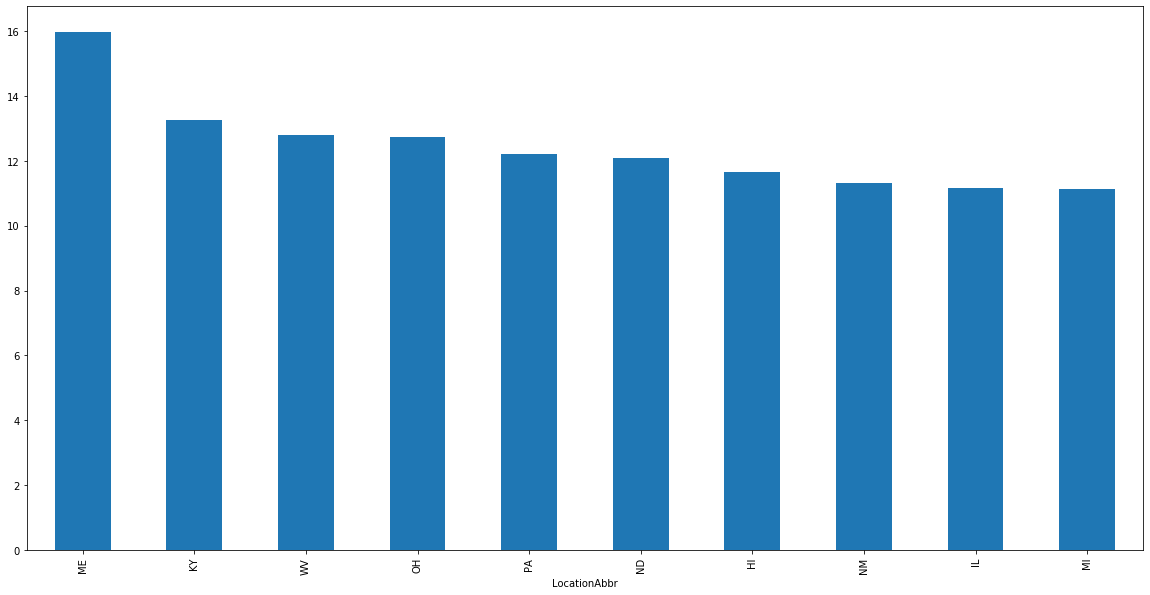

In [110]:
grouped_asthma_series[:10].plot(kind='bar', figsize=(20,10))

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files, converting json files to pandas DataFrame, and visualizing data!